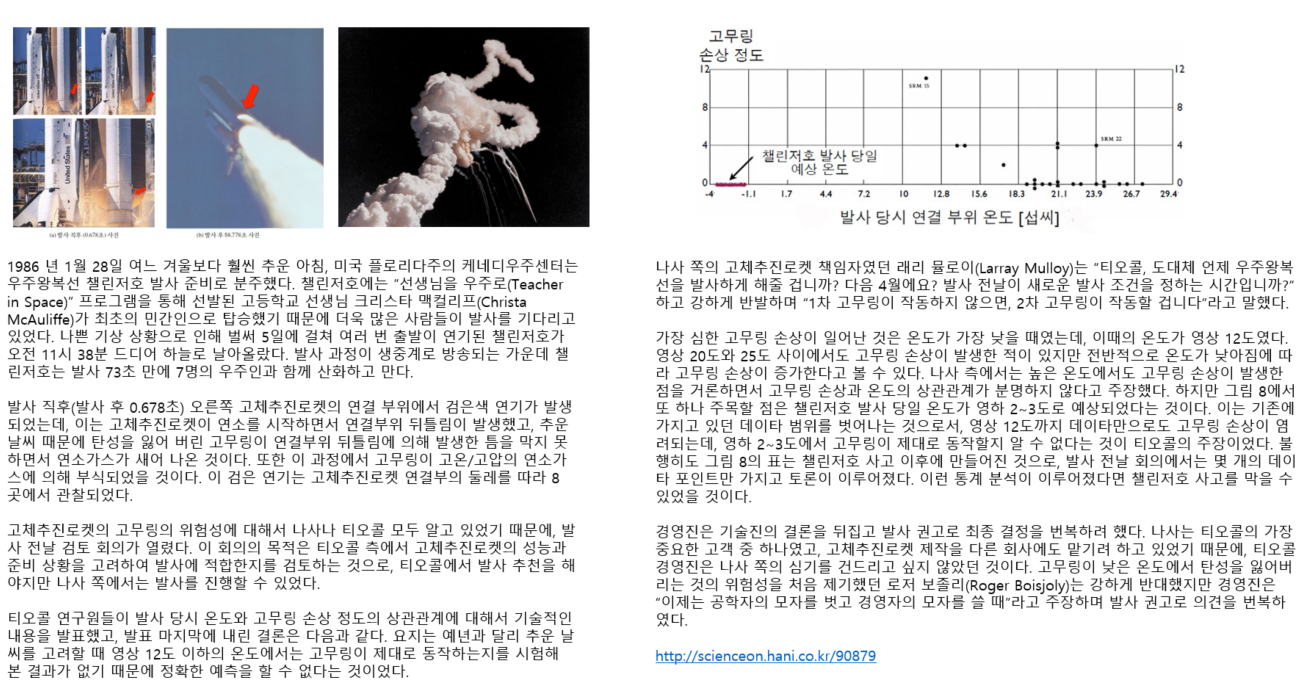

In [1]:
from IPython.display import Image
Image('img/challenger.png')

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import statsmodels.discrete.discrete_model as sm
from patsy import dmatrices

In [47]:
data = pd.read_csv('data/o-ring-erosion-or-blowby2.csv', header = None)
data.rename(columns = {0: 'Rings_at_risk', 
                       1: 'Y_Distress', 
                       2: 'Temp', 
                       3: 'Pressure', 
                       4: 'Flight_ID'}, inplace = True)

data.head()

,Rings_at_risk,Y_Distress,Temp,Pressure,Flight_ID
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


In [48]:
data.describe()

,Rings_at_risk,Y_Distress,Temp,Pressure,Flight_ID
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.304348,69.565217,152.173913,12.00000
std,0.0,0.470472,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,1.000000,75.000000,200.000000,17.50000
max,6.0,1.000000,81.000000,200.000000,23.00000


In [49]:
total_num_failures = sum(data.Y_Distress)
total_num_failures

7

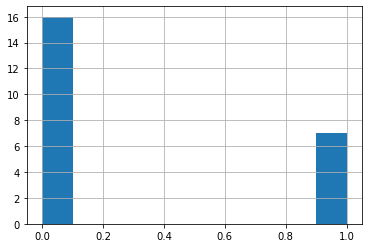

In [50]:
data['Y_Distress'].hist()      #### Y_Distress = 2는 1로 변경해주었다. 

In [51]:
## subsetting data 
failures = data.loc[(data.Y_Distress == 1)]
no_failures = data.loc[(data.Y_Distress == 0)]
avg_temp = np.mean(data.Temp)
avg_temp_failures = np.mean(failures.Temp)
avg_temp_no_failures = np.mean(no_failures.Temp)

print(failures)
print('----------------------------------------------')
print(avg_temp_failures)

    Rings_at_risk  Y_Distress  Temp  Pressure  Flight_ID
1               6           1    70        50          2
8               6           1    57       200          9
9               6           1    63       200         10
10              6           1    70       200         11
13              6           1    53       200         14
20              6           1    75       200         21
22              6           1    58       200         23
----------------------------------------------
63.714285714285715


In [52]:
# frequencies
failures_freq = failures.Temp.value_counts() 
no_failures_freq = no_failures.Temp.value_counts()

print(failures_freq)
print('----------------------------------------------')
print(no_failures_freq)

70    2
63    1
53    1
75    1
58    1
57    1
Name: Temp, dtype: int64
----------------------------------------------
67    3
76    2
70    2
79    1
78    1
75    1
73    1
72    1
69    1
68    1
66    1
81    1
Name: Temp, dtype: int64


In [54]:
#get the data in correct format
y, X = dmatrices('Y_Distress ~ Temp', data, return_type = 'dataframe')

#build the model
logit = sm.Logit(y, X)
result = logit.fit()

# summarize the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Y_Distress   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Mon, 27 Jul 2020   Pseudo R-squ.:                  0.2813
Time:                        15:48:57   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0429      7.379      2.039      0.041       0.581      29.505
Temp          -0.2322      0.

In [56]:
# odds ratios and 95% CI
print (round(np.exp(result.params[1]),2))
print('----------------------------------------------')

params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print( 'Confidence Interval Odds: ', np.exp(conf[1:]))

0.79
----------------------------------------------
Confidence Interval Odds:            2.5%     97.5%        OR
Temp  0.641271  0.980176  0.792817
